In this lecture we'll use the scikit-learn library (and analyze images).
With this lib we can:
- preprocess data
- use classifiers, e.g. logistic regression (see 1.1.11 in docs)
- support vector machines
- ready-to-use datasets
Let's now import what we need.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

Logistic regression is a different model from the simple perceptron: we can produce different models basing on constraints.
It performs linear separation between classes with its own model + LMS minimization (log likelihood).
So it gives the probability that a data is into a class or another.
**NOTE** In medical cases we want our model to be understandable (we don't like to blackbox the health system), then we'll prefer a decision tree (for example).

In [10]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='pandas')

$X$ represent the actual image while $y$ represents its label.
Usually supervised learning > clustering.
We want to avoid overtraining of course, i.e. we want to generalize our model (in order to apply it to new data).
So let's split our data into two sets: one for training and one for testing.
We can also use cross validation as described in theoretical lectures (very used in real applications).

In [15]:
X.shape, X.dtype, y.shape, y.dtype

((70000, 784), dtype('int64'), (70000,), dtype('O'))

Shape is strange: it has been flattened (i.e. vectorized).
We don't care where a pixel is, at least in this analysis.
Why int64?
If unsigned, 255 + 1 = 0 (*no buono*).
For a standard int we don't have this problem plus we can cast it as unsigned.
Notice that:

In [16]:
X.max(), X.min()

(255, 0)

In [6]:
train_samples = int(5e3)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=int(1e4), random_state=42)

This dataset consists in low resolution images of handwritten letters.
Gray level images are a matrix of unsigned integers (8-bit long).
Color images are tensor (RGB, one matrix per color).
Pixels are our descriptive variables.

In matplotlib, an axis is a subfeature (in one figure we can have multiple axis).

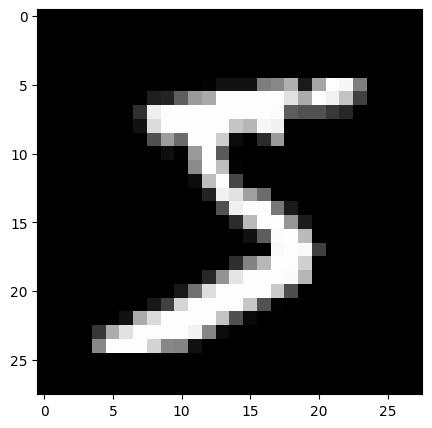

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
ax.imshow(X[0].reshape(28, 28), cmap='gray')